In [68]:
import pandas as pd
df = pd.read_stata("close_college.dta")
display(df.head())

,nearc4,educ,black,smsa,south,married,exper,lwage
0,0,7,1,1,0,1.0,16,6.306275
1,0,12,0,1,0,1.0,9,6.175867
2,0,12,0,1,0,1.0,16,6.580639
3,1,11,0,1,0,1.0,10,5.521461
4,1,12,0,1,0,1.0,16,6.591674


### Descriptive statistics

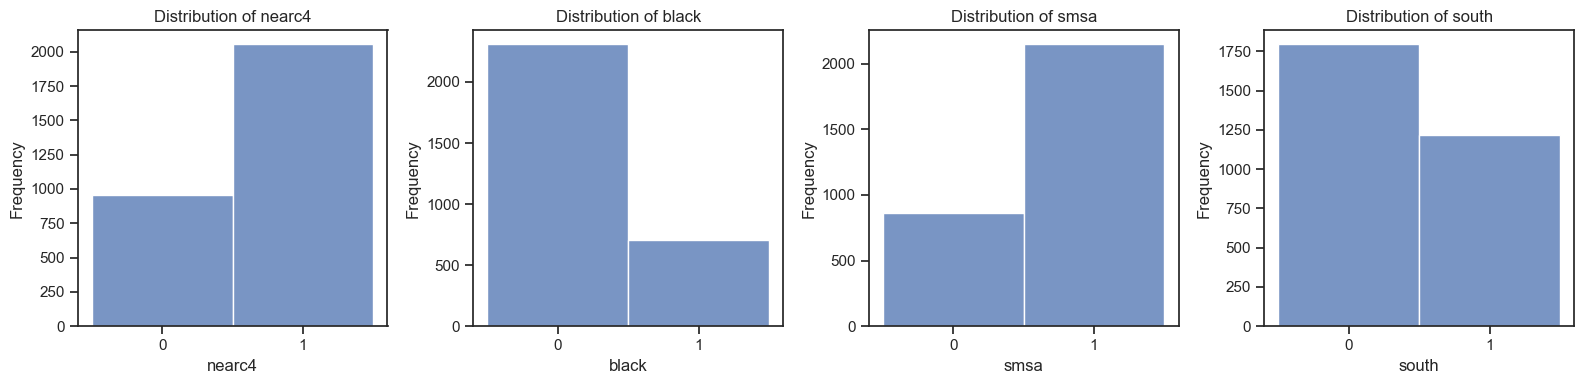

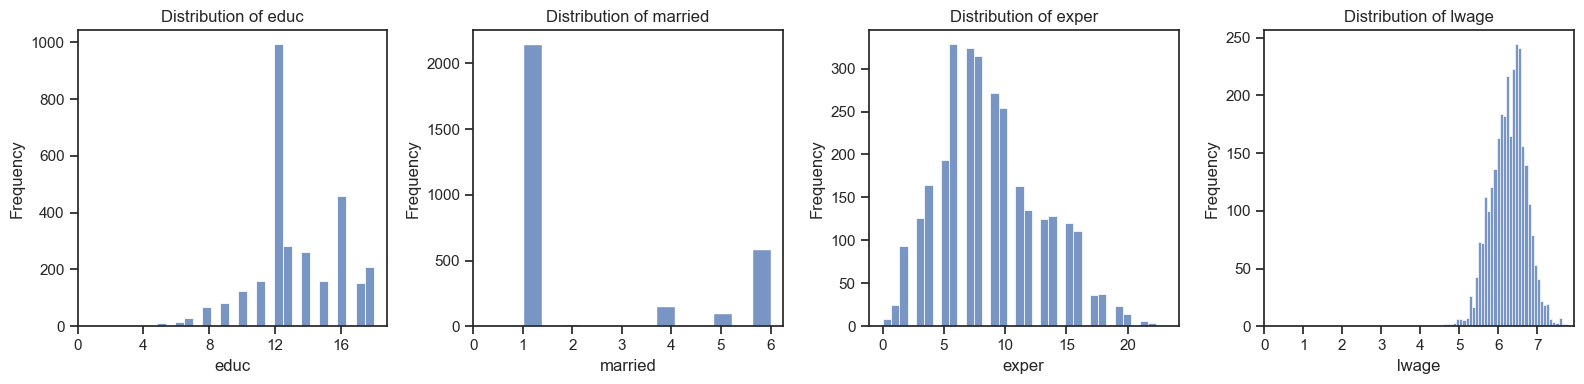

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing binary variables (0 or 1)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Setting up the figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Looping through binary columns and plotting histograms
for i, col in enumerate(binary_cols):
    sns.histplot(data=df[col], ax=axes[i], bins=[0, 1, 2], discrete=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks([0, 1])  # Set x-axis ticks to only show 0 and 1

# Remove any unused subplots
for i in range(len(binary_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

non_binary_cols = [col for col in df.columns if col not in binary_cols]

# Setting up the figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Looping through numerical columns and plotting histograms
for i, col in enumerate(non_binary_cols):
    sns.histplot(data=df[col], ax=axes[i], kde=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    max_value = int(df[col].max())
    
    # Set x-axis ticks with 5 steps
    axes[i].set_xticks(range(0, max_value + 1, max_value // 4))



plt.tight_layout()
plt.show()



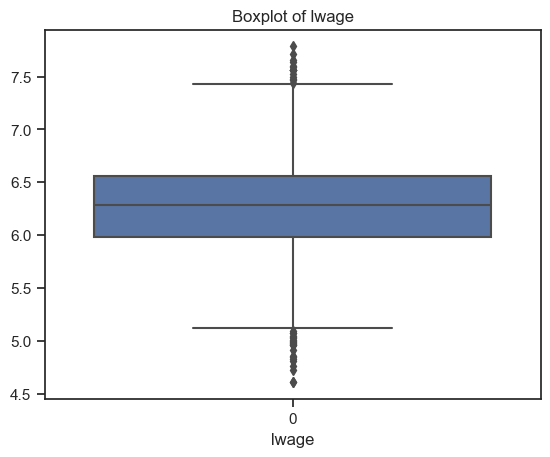

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'lwage' column
sns.boxplot(data=df['lwage'])
plt.title('Boxplot of lwage')
plt.xlabel('lwage')
plt.show()


In [88]:
import pandas as pd

# Create an empty DataFrame to store statistics
statistics_df = pd.DataFrame()

# Iterate through columns in the original DataFrame
for col in df.columns:
    # Calculate statistics for each column and append to statistics_df
    stats = df[col].describe()
    statistics_df[col] = stats

# Transpose the DataFrame so that columns become rows
statistics_df = statistics_df.T
statistics_df['missing_values'] = df.isnull().sum().values

# Print the statistics DataFrame
display(statistics_df)

# Create an empty DataFrame to store statistics
statistics_df = pd.DataFrame()

# Iterate through columns in the original DataFrame
for col in non_binary_cols:
    # Calculate statistics for each column and append to statistics_df
    stats = df[col].describe()
    statistics_df[col] = stats

# Transpose the DataFrame so that columns become rows
statistics_df = statistics_df.T
statistics_df['missing_values'] = df.loc[:, non_binary_cols].isnull().sum().values

# Print the statistics DataFrame
display(statistics_df)


,count,mean,std,min,25%,50%,75%,max,missing_values
nearc4,3010.0,0.682060,0.465753,0.00000,0.000000,1.000000,1.000000,1.000000,0
educ,3010.0,13.263455,2.676913,1.00000,12.000000,13.000000,16.000000,18.000000,0
black,3010.0,0.233555,0.423162,0.00000,0.000000,0.000000,0.000000,1.000000,0
smsa,3010.0,0.712957,0.452457,0.00000,0.000000,1.000000,1.000000,1.000000,0
south,3010.0,0.403654,0.490711,0.00000,0.000000,0.000000,1.000000,1.000000,0
married,3003.0,2.271395,2.066823,1.00000,1.000000,1.000000,4.000000,6.000000,7
exper,3010.0,8.856146,4.141672,0.00000,6.000000,8.000000,11.000000,23.000000,0
lwage,3010.0,6.261832,0.443798,4.60517,5.976985,6.286928,6.563503,7.784889,0


,count,mean,std,min,25%,50%,75%,max,missing_values
educ,3010.0,13.263455,2.676913,1.00000,12.000000,13.000000,16.000000,18.000000,0
married,3003.0,2.271395,2.066823,1.00000,1.000000,1.000000,4.000000,6.000000,7
exper,3010.0,8.856146,4.141672,0.00000,6.000000,8.000000,11.000000,23.000000,0
lwage,3010.0,6.261832,0.443798,4.60517,5.976985,6.286928,6.563503,7.784889,0


### Correlations

In [3]:
correlation_matrix = df.corr()
print(correlation_matrix)



           nearc4      educ     black      smsa     south   married     exper  \
nearc4   1.000000  0.144240 -0.075017  0.353731 -0.222046  0.016058 -0.061621   
educ     0.144240  1.000000 -0.269388  0.187579 -0.201411  0.070970 -0.652956   
black   -0.075017 -0.269388  1.000000 -0.036813  0.341267  0.108788  0.139209   
smsa     0.353731  0.187579 -0.036813  1.000000 -0.184474  0.082909 -0.135722   
south   -0.222046 -0.201411  0.341267 -0.184474  1.000000 -0.003022  0.111650   
married  0.016058  0.070970  0.108788  0.082909 -0.003022  1.000000 -0.218000   
exper   -0.061621 -0.652956  0.139209 -0.135722  0.111650 -0.218000  1.000000   
lwage    0.163621  0.314224 -0.303206  0.234600 -0.283630 -0.208023  0.012484   

            lwage  
nearc4   0.163621  
educ     0.314224  
black   -0.303206  
smsa     0.234600  
south   -0.283630  
married -0.208023  
exper    0.012484  
lwage    1.000000  


In [6]:

correlation_pairs = correlation_matrix.unstack().sort_values()
correlation_pairs = correlation_pairs[correlation_pairs != 1].drop_duplicates()
print(correlation_pairs)



exper    educ      -0.652956
black    lwage     -0.303206
south    lwage     -0.283630
black    educ      -0.269388
nearc4   south     -0.222046
exper    married   -0.218000
married  lwage     -0.208023
south    educ      -0.201411
         smsa      -0.184474
smsa     exper     -0.135722
black    nearc4    -0.075017
exper    nearc4    -0.061621
black    smsa      -0.036813
married  south     -0.003022
lwage    exper      0.012484
nearc4   married    0.016058
educ     married    0.070970
married  smsa       0.082909
         black      0.108788
exper    south      0.111650
black    exper      0.139209
educ     nearc4     0.144240
nearc4   lwage      0.163621
smsa     educ       0.187579
         lwage      0.234600
educ     lwage      0.314224
south    black      0.341267
smsa     nearc4     0.353731
dtype: float64
